In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing


housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_scaled = preprocessing.scale(housing.data)

scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), housing_data_scaled]

In [2]:
n_epochs = 5000
learning_rate = 0.01
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)

    best_theta = theta.eval()
print(best_theta)

Epoch 0 MSE = 4.583411
Epoch 100 MSE = 0.7016077
Epoch 200 MSE = 0.61815214
Epoch 300 MSE = 0.5917281
Epoch 400 MSE = 0.5732602
Epoch 500 MSE = 0.559901
Epoch 600 MSE = 0.5502185
Epoch 700 MSE = 0.54319584
Epoch 800 MSE = 0.53809786
Epoch 900 MSE = 0.5343936
Epoch 1000 MSE = 0.5316991
Epoch 1100 MSE = 0.5297365
Epoch 1200 MSE = 0.52830535
Epoch 1300 MSE = 0.5272602
Epoch 1400 MSE = 0.52649504
Epoch 1500 MSE = 0.5259345
Epoch 1600 MSE = 0.52552235
Epoch 1700 MSE = 0.52521896
Epoch 1800 MSE = 0.5249949
Epoch 1900 MSE = 0.5248288
Epoch 2000 MSE = 0.52470535
Epoch 2100 MSE = 0.52461356
Epoch 2200 MSE = 0.52454466
Epoch 2300 MSE = 0.5244926
Epoch 2400 MSE = 0.5244536
Epoch 2500 MSE = 0.5244239
Epoch 2600 MSE = 0.52440137
Epoch 2700 MSE = 0.5243839
Epoch 2800 MSE = 0.5243707
Epoch 2900 MSE = 0.5243604
Epoch 3000 MSE = 0.5243522
Epoch 3100 MSE = 0.52434593
Epoch 3200 MSE = 0.52434117
Epoch 3300 MSE = 0.5243371
Epoch 3400 MSE = 0.5243339
Epoch 3500 MSE = 0.52433133
Epoch 3600 MSE = 0.52432984


In [3]:
housing.data.shape
shuffle_index = np.random.permutation(housing.data.shape[0])
train_index = shuffle_index[0:16512]
test_index = shuffle_index[16512::]
X_train = housing.data[train_index]
y_train = housing.target[train_index]
X_test = housing.data[test_index]
y_test = housing.target[test_index]

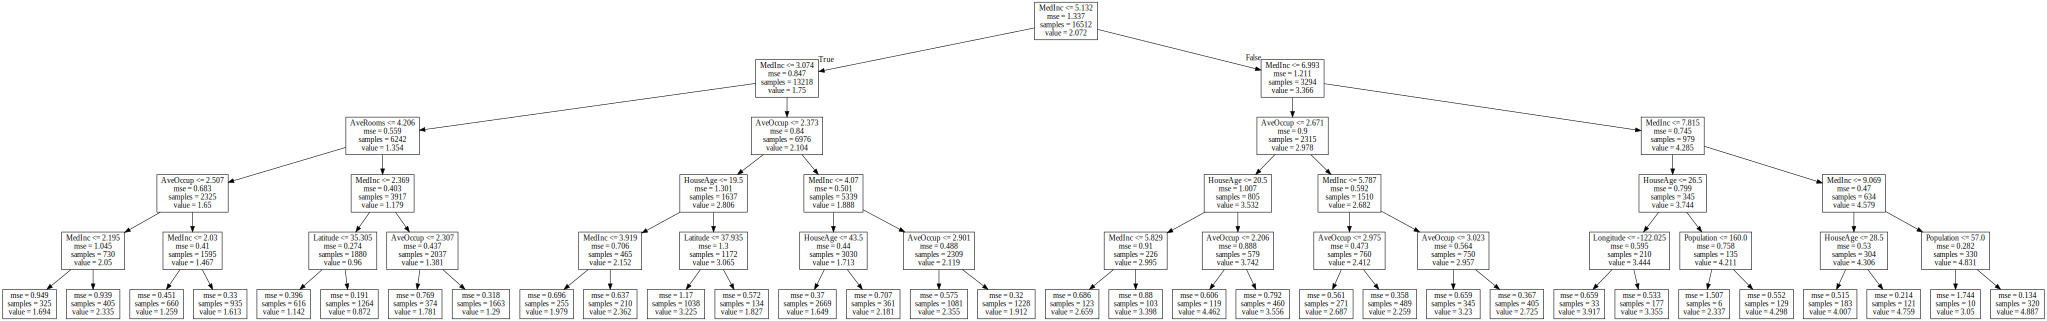

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
#from sklearn import tree

#import pydotplus


tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

Source( export_graphviz(tree_reg, out_file=None, feature_names=housing.feature_names))
#graph.view()
#SVG(graph.pipe(format='svg'))
#export_graphviz(tree_reg)
#graph = pydotplus.graph_from_dot_data(tree.dot.getvalue()) 


# converting into the pdf file
#with open("tree.dot", "w") as f:
#    f = export_graphviz(tree_reg, out_file=f)


In [5]:
y_pred = tree_reg.predict(X_test)
y_pred_train = tree_reg.predict(X_train)

In [6]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)
mse_train, mse_test

(0.49338330628605026, 0.5207896665900039)

In [41]:
type(housing.data)

numpy.ndarray

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data = np.c_[housing.data, housing.target], columns=housing.feature_names + ['target'])

plt.matshow(df.corr())
plt.show()

df.corr()

<Figure size 480x480 with 1 Axes>

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
names = housing.feature_names
best_theta_no_bias = best_theta[1:9]
best_theta_no_bias
list(zip(np.absolute(best_theta_no_bias) / sum(np.absolute(best_theta_no_bias)), 
         map(lambda x: round(x, 4), tree_reg.feature_importances_), names))

[(array([0.24913596], dtype=float32), 0.7743, 'MedInc'),
 (array([0.03568504], dtype=float32), 0.0393, 'HouseAge'),
 (array([0.08008333], dtype=float32), 0.0232, 'AveRooms'),
 (array([0.09205109], dtype=float32), 0.0, 'AveBedrms'),
 (array([0.00133311], dtype=float32), 0.0039, 'Population'),
 (array([0.01180845], dtype=float32), 0.1398, 'AveOccup'),
 (array([0.26934028], dtype=float32), 0.0188, 'Latitude'),
 (array([0.2605627], dtype=float32), 0.0006, 'Longitude')]

In [24]:
df.iloc[0]

MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Latitude       37.880000
Longitude    -122.230000
target          4.526000
Name: 0, dtype: float64

Text(0.5,0.98,'This is Figure title')

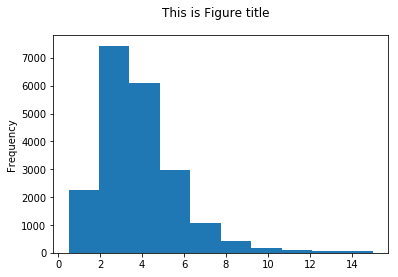

In [23]:
df.iloc[:,0].plot.hist()
plt.suptitle("Med Inc")

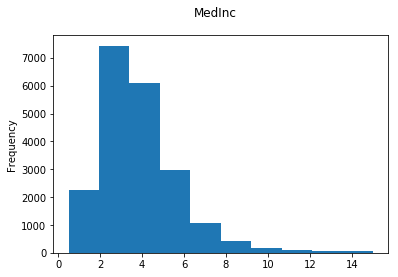

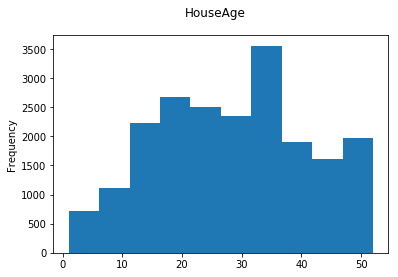

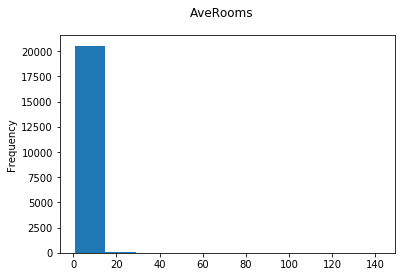

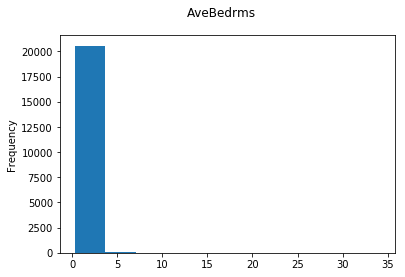

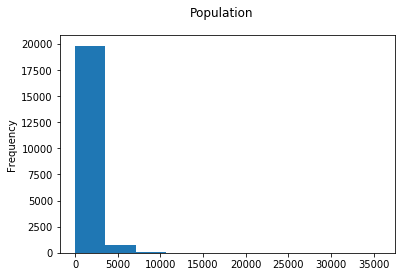

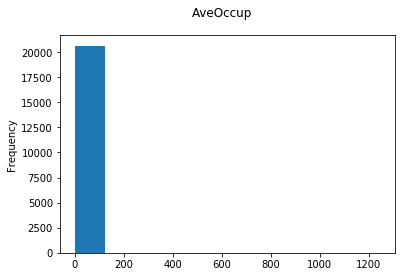

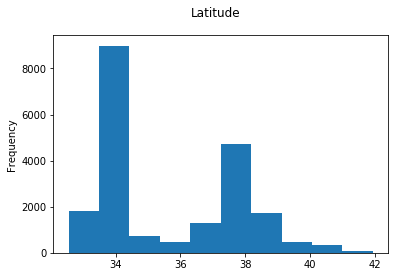

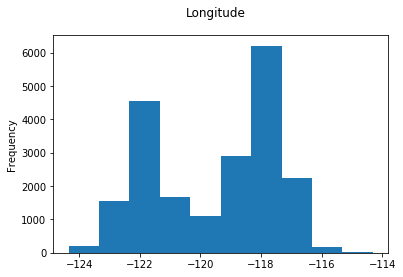

In [29]:
for i in np.arange(8):
    plt.figure(i)
    df.iloc[:,i].plot.hist()
    plt.suptitle(names[i])

In [27]:
names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [30]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
rand_var = np.random.uniform(low = -1, high=1, size=20640)

In [32]:
rand_var[0:5]

array([-0.24017192,  0.85259778,  0.66180338,  0.36883785,  0.55272773])